# BulkOmics Tools

In [1]:
# Data Science Tools
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd
import seaborn as sns
import scipy.stats as stats
# Bioinfokit
# !pip install bioinfokit
import bioinfokit as bik
from bioinfokit import analys, visuz

## Import log2-transofmed Analyte data

In [31]:
df = pd.read_csv('Cytokine_data.csv')
# df.rename(columns={'Unnamed: 0': 'Sample'}, inplace=True) # Rename sample column name if needed
df.set_index(['Sample'], inplace=True)
# df = df.T
df = np.log2(df+1)
df

,IL-17A,IL-2,IL-4,IL-10,IL-6,TNF-α,Fas,FasL,IFN-γ,Granzyme A,Granzyme B,Perforin,Granulysin
Sample,,,,,,,,,,,,,
Anti-HER2/neu Construct #1 1,0.598365,10.977323,2.618239,2.589763,1.575312,3.817623,3.372952,4.352759,6.124742,11.663958,13.927136,7.114159,7.359398
Anti-HER2/neu Construct #1 2,3.012390,11.237730,1.713696,2.627607,1.575312,1.687061,3.735522,3.660951,5.741197,10.883728,12.530855,6.645875,5.449561
Anti-HER2/neu Construct #1 3,1.489543,12.778126,3.887525,3.334854,2.339137,4.561326,5.255501,5.769190,9.262400,14.232641,15.586400,10.809213,7.842539
Anti-HER2/neu Construct #1 4,2.424116,11.038020,1.985500,3.077243,1.709291,3.211012,3.310340,4.711550,6.600359,12.524419,14.267754,8.011339,6.380764
Anti-HER2/neu Construct #1 5,0.092207,8.773172,2.121015,0.545968,1.575312,2.028569,2.606442,4.538041,6.044394,12.144432,13.368819,7.606442,5.629357
Anti-HER2/neu Construct #1 6,2.642239,12.070456,2.620586,2.032101,2.111031,3.407353,4.044394,4.917670,8.407353,12.613133,13.915569,7.409815,7.377644
Anti-HER2/neu Construct #1 7,0.512985,11.141896,2.998196,3.452859,1.875780,3.132577,4.279471,4.958100,7.955940,12.801037,14.573468,9.785371,8.008821
Anti-HER2/neu Construct #1 8,0.108357,12.095545,1.713696,0.545968,1.575312,2.508429,3.424922,3.494544,4.998647,10.788433,13.048596,7.413882,7.305423
Anti-HER2/neu Construct #1 9,0.126973,10.850593,3.114367,2.263034,1.575312,3.244887,3.703765,5.028039,6.695715,12.776929,15.467524,9.509478,9.609179


In [33]:
# Cluster samples and Analytes

cluster_map = sns.clustermap(df)
plt.close()
clustered_rows = cluster_map.dendrogram_row.reordered_ind
clustered_cols = cluster_map.dendrogram_col.reordered_ind

clustered_df = df.iloc[:, clustered_cols] # Analyte clustering 
# clustered_df = df.iloc[clustered_rows, :].iloc[:, clustered_cols] # Analyte and sample clustering
clustered_df

,IL-2,Granzyme A,Granzyme B,IFN-γ,Perforin,Granulysin,FasL,IL-17A,TNF-α,Fas,IL-10,IL-4,IL-6
Sample,,,,,,,,,,,,,
Anti-HER2/neu Construct #1 1,10.977323,11.663958,13.927136,6.124742,7.114159,7.359398,4.352759,0.598365,3.817623,3.372952,2.589763,2.618239,1.575312
Anti-HER2/neu Construct #1 2,11.237730,10.883728,12.530855,5.741197,6.645875,5.449561,3.660951,3.012390,1.687061,3.735522,2.627607,1.713696,1.575312
Anti-HER2/neu Construct #1 3,12.778126,14.232641,15.586400,9.262400,10.809213,7.842539,5.769190,1.489543,4.561326,5.255501,3.334854,3.887525,2.339137
Anti-HER2/neu Construct #1 4,11.038020,12.524419,14.267754,6.600359,8.011339,6.380764,4.711550,2.424116,3.211012,3.310340,3.077243,1.985500,1.709291
Anti-HER2/neu Construct #1 5,8.773172,12.144432,13.368819,6.044394,7.606442,5.629357,4.538041,0.092207,2.028569,2.606442,0.545968,2.121015,1.575312
Anti-HER2/neu Construct #1 6,12.070456,12.613133,13.915569,8.407353,7.409815,7.377644,4.917670,2.642239,3.407353,4.044394,2.032101,2.620586,2.111031
Anti-HER2/neu Construct #1 7,11.141896,12.801037,14.573468,7.955940,9.785371,8.008821,4.958100,0.512985,3.132577,4.279471,3.452859,2.998196,1.875780
Anti-HER2/neu Construct #1 8,12.095545,10.788433,13.048596,4.998647,7.413882,7.305423,3.494544,0.108357,2.508429,3.424922,0.545968,1.713696,1.575312
Anti-HER2/neu Construct #1 9,10.850593,12.776929,15.467524,6.695715,9.509478,9.609179,5.028039,0.126973,3.244887,3.703765,2.263034,3.114367,1.575312


# Grouped Analyte Analysis

In [34]:
# Design matrix
group_data = {
    'Sample': list(clustered_df.T.columns),
    'Group': ['Anti-HER2/neu Construct #1','Anti-HER2/neu Construct #1','Anti-HER2/neu Construct #1',
              'Anti-HER2/neu Construct #1','Anti-HER2/neu Construct #1','Anti-HER2/neu Construct #1',
              'Anti-HER2/neu Construct #1','Anti-HER2/neu Construct #1','Anti-HER2/neu Construct #1',
              
              'Anti-HER2/neu Construct #2','Anti-HER2/neu Construct #2','Anti-HER2/neu Construct #2',
              'Anti-HER2/neu Construct #2','Anti-HER2/neu Construct #2','Anti-HER2/neu Construct #2',
              'Anti-HER2/neu Construct #2','Anti-HER2/neu Construct #2','Anti-HER2/neu Construct #2',
              
              'Anti-HER2/neu Construct #3','Anti-HER2/neu Construct #3','Anti-HER2/neu Construct #3',
              'Anti-HER2/neu Construct #3','Anti-HER2/neu Construct #3','Anti-HER2/neu Construct #3',
              'Anti-HER2/neu Construct #3','Anti-HER2/neu Construct #3','Anti-HER2/neu Construct #3',
              
              'Non-TD','Non-TD','Non-TD','Non-TD','Non-TD','Non-TD','Non-TD','Non-TD','Non-TD'
              ]
}
group_df = pd.DataFrame(group_data)
unique_groups = group_df['Group'].unique()

# Map samples to their groups
column_to_group = dict(zip(group_df['Sample'], group_df['Group']))
column_to_group

{'Anti-HER2/neu Construct #1 1': 'Anti-HER2/neu Construct #1',
 'Anti-HER2/neu Construct #1 2': 'Anti-HER2/neu Construct #1',
 'Anti-HER2/neu Construct #1 3': 'Anti-HER2/neu Construct #1',
 'Anti-HER2/neu Construct #1 4': 'Anti-HER2/neu Construct #1',
 'Anti-HER2/neu Construct #1 5': 'Anti-HER2/neu Construct #1',
 'Anti-HER2/neu Construct #1 6': 'Anti-HER2/neu Construct #1',
 'Anti-HER2/neu Construct #1 7': 'Anti-HER2/neu Construct #1',
 'Anti-HER2/neu Construct #1 8': 'Anti-HER2/neu Construct #1',
 'Anti-HER2/neu Construct #1 9': 'Anti-HER2/neu Construct #1',
 'Anti-HER2/neu Construct #2 1': 'Anti-HER2/neu Construct #2',
 'Anti-HER2/neu Construct #2 2': 'Anti-HER2/neu Construct #2',
 'Anti-HER2/neu Construct #2 3': 'Anti-HER2/neu Construct #2',
 'Anti-HER2/neu Construct #2 4': 'Anti-HER2/neu Construct #2',
 'Anti-HER2/neu Construct #2 5': 'Anti-HER2/neu Construct #2',
 'Anti-HER2/neu Construct #2 6': 'Anti-HER2/neu Construct #2',
 'Anti-HER2/neu Construct #2 7': 'Anti-HER2/neu Constru

### PCA

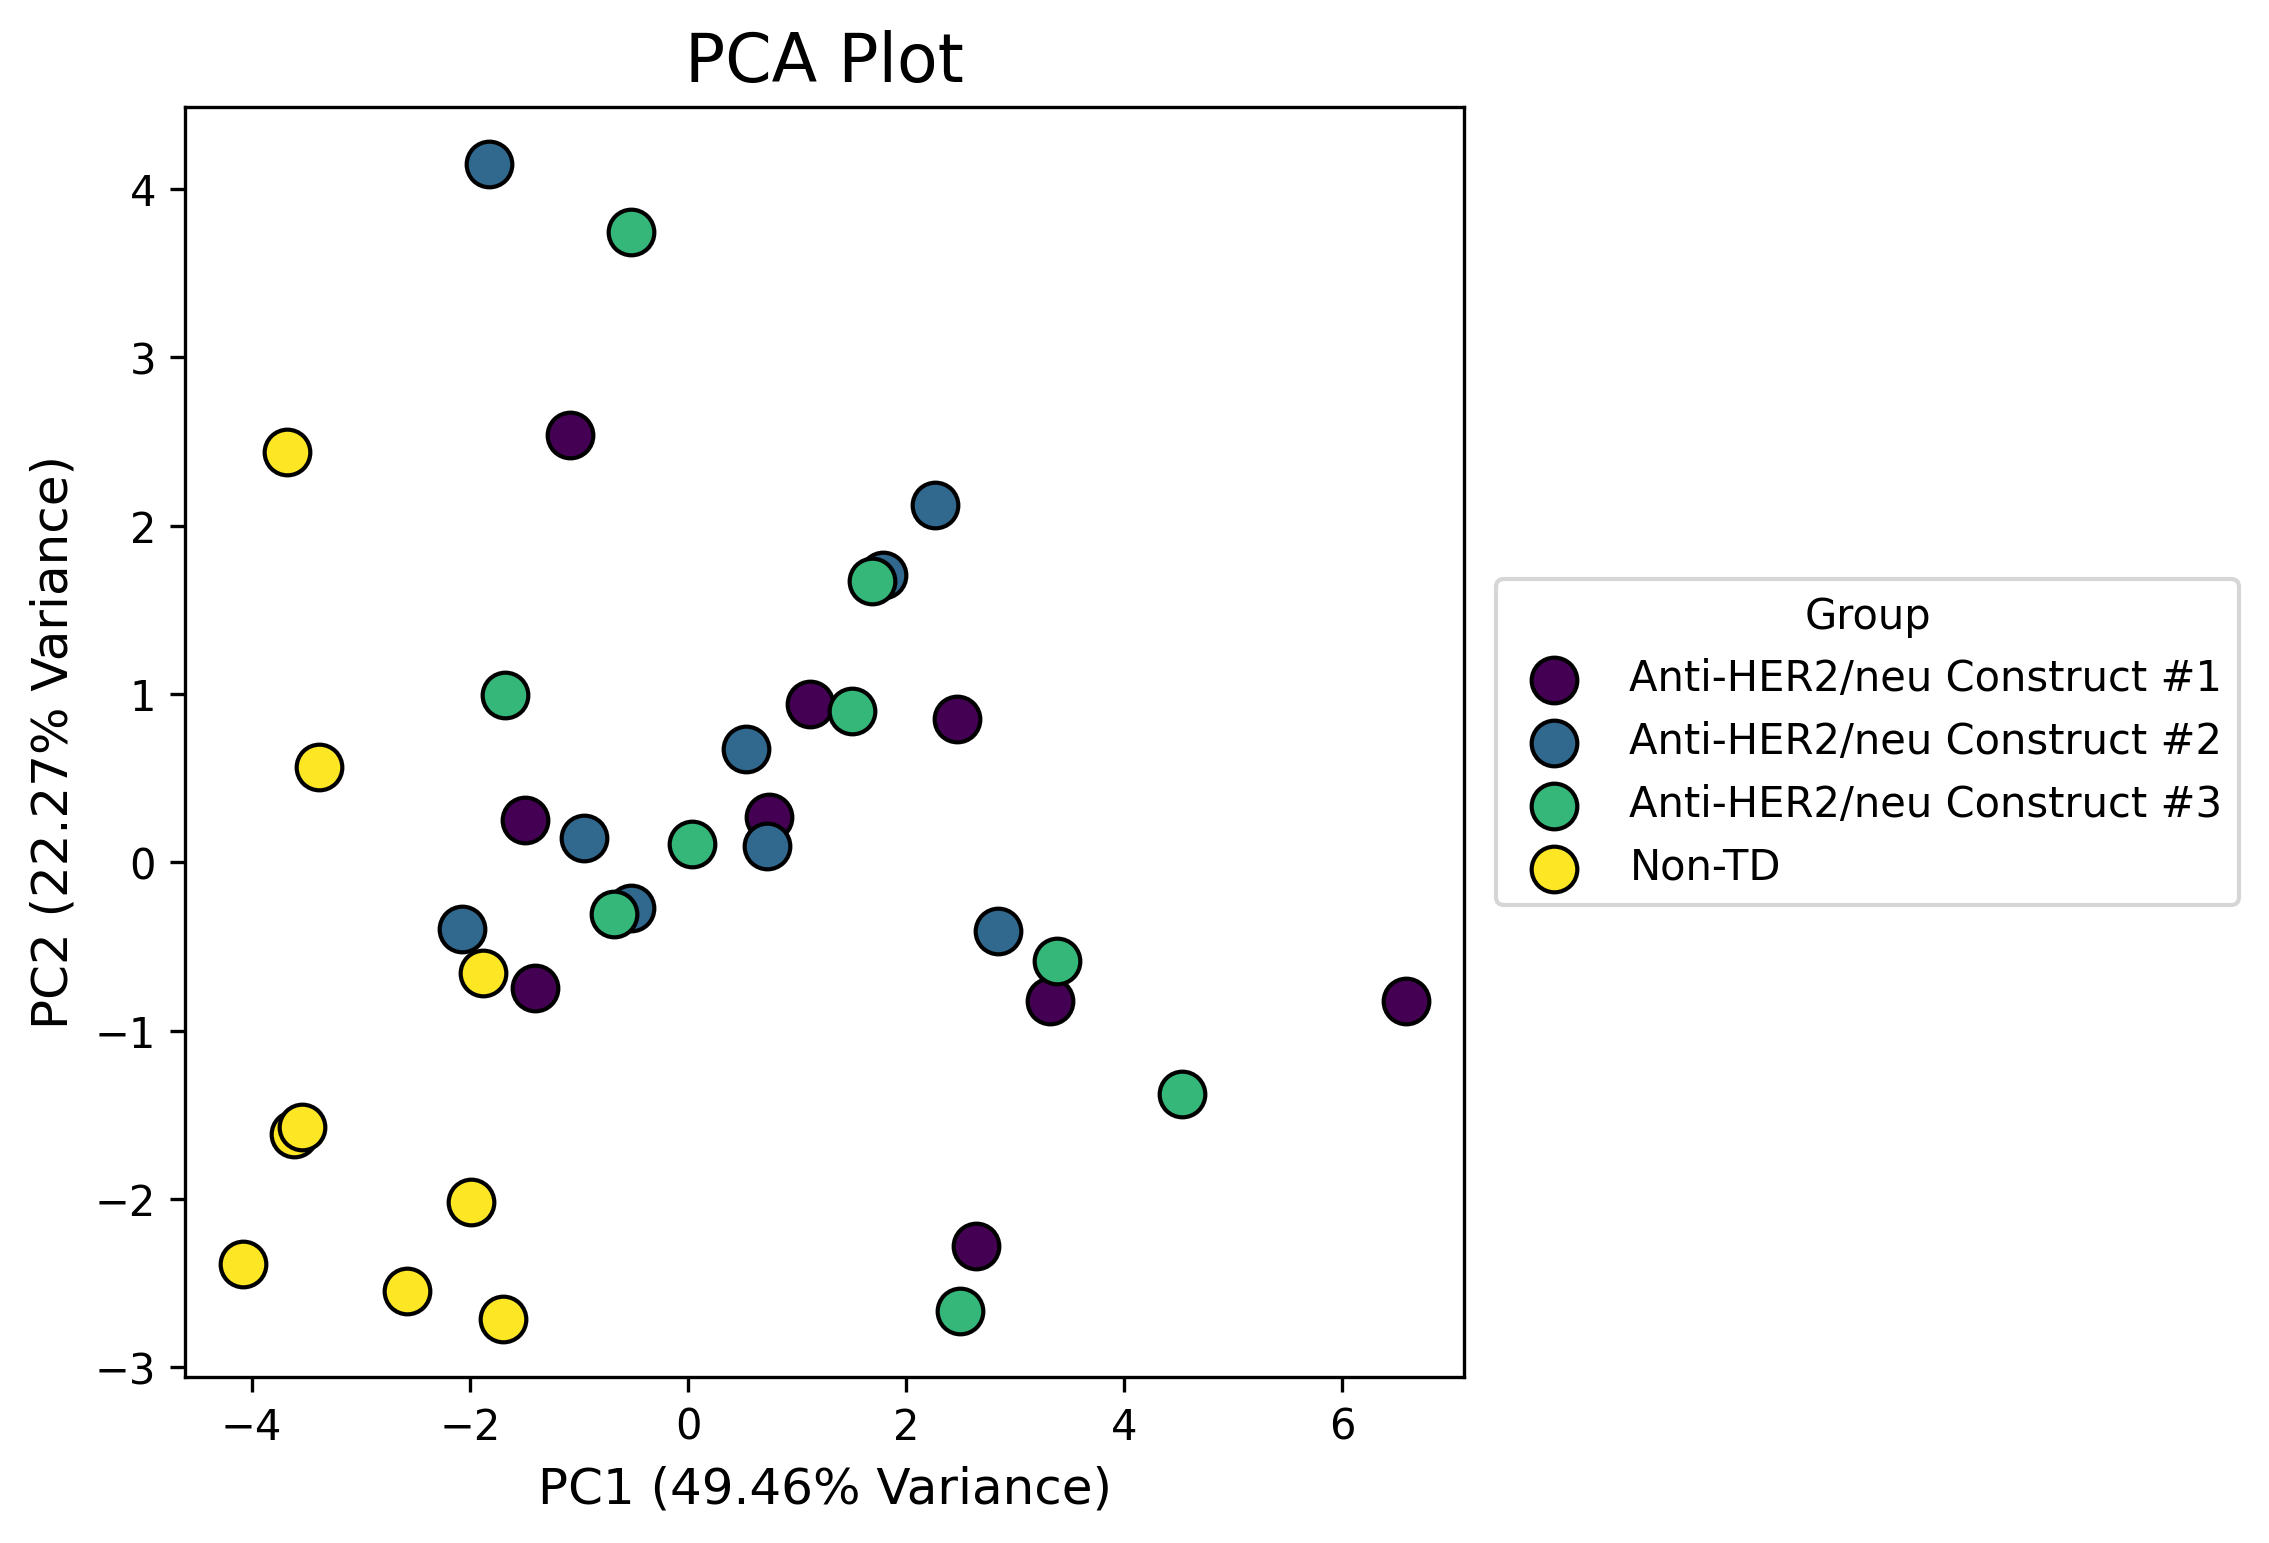

In [35]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(clustered_df)

# Perform PCA
pca = PCA(n_components=2)
pca_results = pca.fit_transform(scaled_data)
pca_results

# Create a df for PCA results
pca_df = pd.DataFrame(data=pca_results, columns=['PC1', 'PC2'])
pca_df['Sample'] = list(clustered_df.T.columns)

# Plot the first 2 PC
plt.figure(figsize=(5.5, 5.5), dpi=300)

pca_df['Group'] = pca_df['Sample'].map(column_to_group)
unique_groups = pca_df['Group'].unique()
colors = plt.cm.viridis(np.linspace(0, 1, len(unique_groups))) # Choose cmap here, i.e. cm.viridis ot cm.tab10 
                                                               # https://matplotlib.org/stable/users/explain/colors/colormaps.html

for group, color in zip(unique_groups, colors):
    subset = pca_df[pca_df['Group'] == group]
    plt.scatter(
        subset['PC1'], subset['PC2'], 
        label=f"{group}",
        color=color, edgecolor='k', s=120
    )

plt.title('PCA Plot', fontsize=16)
plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.2f}% Variance)", fontsize=12)
plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.2f}% Variance)", fontsize=12)
plt.legend(
    title="Group", fontsize=10, loc='center left', 
    bbox_to_anchor=(1.025, 0.5), borderaxespad=0.
) 
# plt.grid(True)
plt.savefig('PCA plot.png', dpi=600, bbox_inches='tight')
plt.show()

### Heatmap

In [17]:
df_scaled_centred = stats.zscore(df, axis=0) # Case 2

visuz.gene_exp.hmap(
                    # df=df, # Case 1
                    df=df_scaled_centred, # Case 2
                    cmap='bwr',
                    # Keep the following consistent with the clustering step!!!
                    colclus=True, rowclus=False, # Analyte clustering
                    # colclus=True, rowclus=True, # Analyte and sample clustering
                    dim=(5.5,9),  
                    tickfont=(6,6), r=600, figname='clustered_df', show=False)
plt.close()

### Correlation analysis

In [20]:
corr_df

Analyte,IL-17A,IL-2,IL-4,IL-10,IL-6,TNF-α,Fas,FasL,IFN-γ,Granzyme A,Granzyme B,Perforin,Granulysin,Group
Analyte,,,,,,,,,,,,,,
Anti-HER2/neu Construct #1 1,0.598365,10.977323,2.618239,2.589763,1.575312,3.817623,3.372952,4.352759,6.124742,11.663958,13.927136,7.114159,7.359398,Anti-HER2/neu Construct #1
Anti-HER2/neu Construct #1 2,3.012390,11.237730,1.713696,2.627607,1.575312,1.687061,3.735522,3.660951,5.741197,10.883728,12.530855,6.645875,5.449561,Anti-HER2/neu Construct #1
Anti-HER2/neu Construct #1 3,1.489543,12.778126,3.887525,3.334854,2.339137,4.561326,5.255501,5.769190,9.262400,14.232641,15.586400,10.809213,7.842539,Anti-HER2/neu Construct #1
Anti-HER2/neu Construct #1 4,2.424116,11.038020,1.985500,3.077243,1.709291,3.211012,3.310340,4.711550,6.600359,12.524419,14.267754,8.011339,6.380764,Anti-HER2/neu Construct #1
Anti-HER2/neu Construct #1 5,0.092207,8.773172,2.121015,0.545968,1.575312,2.028569,2.606442,4.538041,6.044394,12.144432,13.368819,7.606442,5.629357,Anti-HER2/neu Construct #1
Anti-HER2/neu Construct #1 6,2.642239,12.070456,2.620586,2.032101,2.111031,3.407353,4.044394,4.917670,8.407353,12.613133,13.915569,7.409815,7.377644,Anti-HER2/neu Construct #1
Anti-HER2/neu Construct #1 7,0.512985,11.141896,2.998196,3.452859,1.875780,3.132577,4.279471,4.958100,7.955940,12.801037,14.573468,9.785371,8.008821,Anti-HER2/neu Construct #1
Anti-HER2/neu Construct #1 8,0.108357,12.095545,1.713696,0.545968,1.575312,2.508429,3.424922,3.494544,4.998647,10.788433,13.048596,7.413882,7.305423,Anti-HER2/neu Construct #1
Anti-HER2/neu Construct #1 9,0.126973,10.850593,3.114367,2.263034,1.575312,3.244887,3.703765,5.028039,6.695715,12.776929,15.467524,9.509478,9.609179,Anti-HER2/neu Construct #1


In [22]:
# Perform analysis

corr_df = clustered_df
corr_df.rename_axis("Analyte", inplace=True)
corr_df.rename_axis("Analyte", axis=1,inplace=True)

correlation_matrix = corr_df.corr(method='pearson') # pearson / spearman 

# Cluster
cluster_map = sns.clustermap(correlation_matrix)
plt.close()
clustered_rows = cluster_map.dendrogram_row.reordered_ind
clustered_cols = cluster_map.dendrogram_col.reordered_ind
correlation_matrix = correlation_matrix.iloc[clustered_rows, :].iloc[:, clustered_cols]


correlation_matrix

Analyte,Perforin,Granulysin,Granzyme A,FasL,IFN-γ,Fas,Granzyme B,IL-4,IL-2,TNF-α,IL-10,IL-17A,IL-6
Analyte,,,,,,,,,,,,,
Perforin,1.000000,0.457040,0.554147,0.625605,0.632035,0.499838,0.599610,0.695524,0.241644,0.524254,0.445342,-0.169165,0.077731
Granulysin,0.457040,1.000000,0.611382,0.646730,0.144072,0.185704,0.373386,0.426648,0.133791,0.042752,-0.158138,-0.383454,0.063576
Granzyme A,0.554147,0.611382,1.000000,0.963600,0.351439,0.367286,0.470204,0.584224,0.145028,-0.001454,0.018679,-0.185184,0.088166
FasL,0.625605,0.646730,0.963600,1.000000,0.471497,0.402569,0.549866,0.639217,0.193476,0.137307,0.078950,-0.144082,0.178981
IFN-γ,0.632035,0.144072,0.351439,0.471497,1.000000,0.759022,0.750857,0.732023,0.671096,0.786441,0.696161,0.474626,0.553859
Fas,0.499838,0.185704,0.367286,0.402569,0.759022,1.000000,0.767446,0.731189,0.726485,0.712531,0.637833,0.374255,0.368121
Granzyme B,0.599610,0.373386,0.470204,0.549866,0.750857,0.767446,1.000000,0.783232,0.797667,0.673777,0.572197,0.211449,0.164577
IL-4,0.695524,0.426648,0.584224,0.639217,0.732023,0.731189,0.783232,1.000000,0.530216,0.643455,0.571785,0.132589,0.330837
IL-2,0.241644,0.133791,0.145028,0.193476,0.671096,0.726485,0.797667,0.530216,1.000000,0.582579,0.507366,0.507939,0.366633


In [25]:
plt.figure(figsize=(6,6)) #Size

sns.heatmap(
    correlation_matrix,   # df
    cmap="bwr",           # Color map
    cbar=False,           # Show the scale
    annot_kws={"size": 1} # Font size
)

# Save the heatmap
output_path = "correlation_matrix_heatmap.png"
plt.savefig(output_path, dpi=300, bbox_inches="tight")
plt.close()

# Pairwise Analyte Analysis

In [75]:
# Select Groups

# Group_1 = "Non-TD T-cells + Tumor"
# Group_2 = "Non-TD T-cell"

Group_1 = "Anti-HER2/neu Construct #1"
Group_2 = "Non-TD"

valid_samples = [sample for sample, group in column_to_group.items() if group in [Group_1, Group_2]]
pairwise_df = df.loc[valid_samples]

pairwise_df

,IL-17A,IL-2,IL-4,IL-10,IL-6,TNF-α,Fas,FasL,IFN-γ,Granzyme A,Granzyme B,Perforin,Granulysin
Sample,,,,,,,,,,,,,
Anti-HER2/neu Construct #1 1,0.598365,10.977323,2.618239,2.589763,1.575312,3.817623,3.372952,4.352759,6.124742,11.663958,13.927136,7.114159,7.359398
Anti-HER2/neu Construct #1 2,3.012390,11.237730,1.713696,2.627607,1.575312,1.687061,3.735522,3.660951,5.741197,10.883728,12.530855,6.645875,5.449561
Anti-HER2/neu Construct #1 3,1.489543,12.778126,3.887525,3.334854,2.339137,4.561326,5.255501,5.769190,9.262400,14.232641,15.586400,10.809213,7.842539
Anti-HER2/neu Construct #1 4,2.424116,11.038020,1.985500,3.077243,1.709291,3.211012,3.310340,4.711550,6.600359,12.524419,14.267754,8.011339,6.380764
Anti-HER2/neu Construct #1 5,0.092207,8.773172,2.121015,0.545968,1.575312,2.028569,2.606442,4.538041,6.044394,12.144432,13.368819,7.606442,5.629357
Anti-HER2/neu Construct #1 6,2.642239,12.070456,2.620586,2.032101,2.111031,3.407353,4.044394,4.917670,8.407353,12.613133,13.915569,7.409815,7.377644
Anti-HER2/neu Construct #1 7,0.512985,11.141896,2.998196,3.452859,1.875780,3.132577,4.279471,4.958100,7.955940,12.801037,14.573468,9.785371,8.008821
Anti-HER2/neu Construct #1 8,0.108357,12.095545,1.713696,0.545968,1.575312,2.508429,3.424922,3.494544,4.998647,10.788433,13.048596,7.413882,7.305423
Anti-HER2/neu Construct #1 9,0.126973,10.850593,3.114367,2.263034,1.575312,3.244887,3.703765,5.028039,6.695715,12.776929,15.467524,9.509478,9.609179


### Perform Multiple T-tests

In [76]:
# NB it is assumed that the data is in log format!!!

from scipy.stats import ttest_ind
from statsmodels.stats.multitest import multipletests

# Separate samples by groups
group1_samples = [sample for sample, group in column_to_group.items() if group == Group_1]
group2_samples = [sample for sample, group in column_to_group.items() if group == Group_2]

# Filter data for the groups
group1_data = df.loc[group1_samples]
group2_data = df.loc[group2_samples]

# Initialize empty results variable
results = []

# Multiple T-tests
for variable in df.columns:
    # Extract data for the variable
    group1_values = group1_data[variable]
    group2_values = group2_data[variable]
    
    # Perform multiple T-tests
    t_stat, p_value = ttest_ind(group1_values, group2_values, equal_var=False)
    
    # Calculate the log(fold change)
    fold_change = group1_values.mean() - group2_values.mean()
    
    # Append results
    results.append({"Variable": variable, "FoldChange": fold_change, "PValue": p_value})

# Convert to df
results_df = pd.DataFrame(results)
results_df["PValue"] = results_df["PValue"].fillna(value=1)

# Apply FDR correction
_, q_values, _, _ = multipletests(results_df["PValue"], method="fdr_bh")

# Add q-values to the DataFrame
results_df["q-value"] = q_values
results_df["-log10(q-value)"] = -np.log10(results_df["q-value"])
results_df["Mean"] = list(pairwise_df.mean())
results_df.rename(columns={'PValue': 'p-value', 'FoldChange': 'log2(FC)'}, inplace=True) # Rename sample column name if needed
results_df.set_index(['Variable'], inplace=True)
results_df = results_df.sort_values(by="log2(FC)", ascending=False)

results_df

,log2(FC),p-value,q-value,-log10(q-value),Mean
Variable,,,,,
IL-2,3.697079,0.000003,0.000019,4.728888,9.369557
Granzyme B,3.323502,0.000001,0.000018,4.142856,12.414485
IFN-γ,2.110903,0.001557,0.005060,2.295839,5.814631
TNF-α,1.722888,0.004338,0.011279,1.947711,2.205093
Fas,1.710250,0.000351,0.001520,2.818183,2.893021
IL-10,1.280479,0.011594,0.025121,1.599956,1.634138
IL-17A,1.159134,0.019323,0.031400,1.503066,0.643453
Perforin,0.875202,0.134610,0.194437,0.711220,7.818574
IL-4,0.739160,0.015755,0.029259,1.533747,2.160734


In [77]:
results_df.to_csv('Pairwise_comp_results #1.csv') # Export Differentially Produced Analyte data

In [78]:
# Define thresholds
fc_threshold = 1  # Log2(FC) threshold
qval_threshold = 0.01  # -log10(q-value) threshold
top_variables = 9

significant = results_df.loc[results_df["q-value"] < qval_threshold]
top_upregulated = significant.loc[significant["log2(FC)"] > fc_threshold]
top_upregulated = top_upregulated.nsmallest(top_variables, "q-value")

top_downregulated = significant.loc[significant["log2(FC)"] < -fc_threshold]
top_downregulated = top_downregulated.nsmallest(top_variables, "q-value")

# Pick colors:
# https://htmlcolorcodes.com/color-picker/

Up_regulated_color = 'red'
Down_regulated_color = 'blue'

Non_significant_color = 'Black'

# Color-code the variables
results_df["Color"] = Non_significant_color
results_df.loc[(results_df["log2(FC)"] < -fc_threshold) & (results_df["q-value"] < qval_threshold), "Color"] = Down_regulated_color
results_df.loc[(results_df["log2(FC)"] > fc_threshold) & (results_df["q-value"] < qval_threshold), "Color"] = Up_regulated_color

results_df

,log2(FC),p-value,q-value,-log10(q-value),Mean,Color
Variable,,,,,,
IL-2,3.697079,0.000003,0.000019,4.728888,9.369557,red
Granzyme B,3.323502,0.000001,0.000018,4.142856,12.414485,red
IFN-γ,2.110903,0.001557,0.005060,2.295839,5.814631,red
TNF-α,1.722888,0.004338,0.011279,1.947711,2.205093,Black
Fas,1.710250,0.000351,0.001520,2.818183,2.893021,red
IL-10,1.280479,0.011594,0.025121,1.599956,1.634138,Black
IL-17A,1.159134,0.019323,0.031400,1.503066,0.643453,Black
Perforin,0.875202,0.134610,0.194437,0.711220,7.818574,Black
IL-4,0.739160,0.015755,0.029259,1.533747,2.160734,Black


## Volcano Plot 

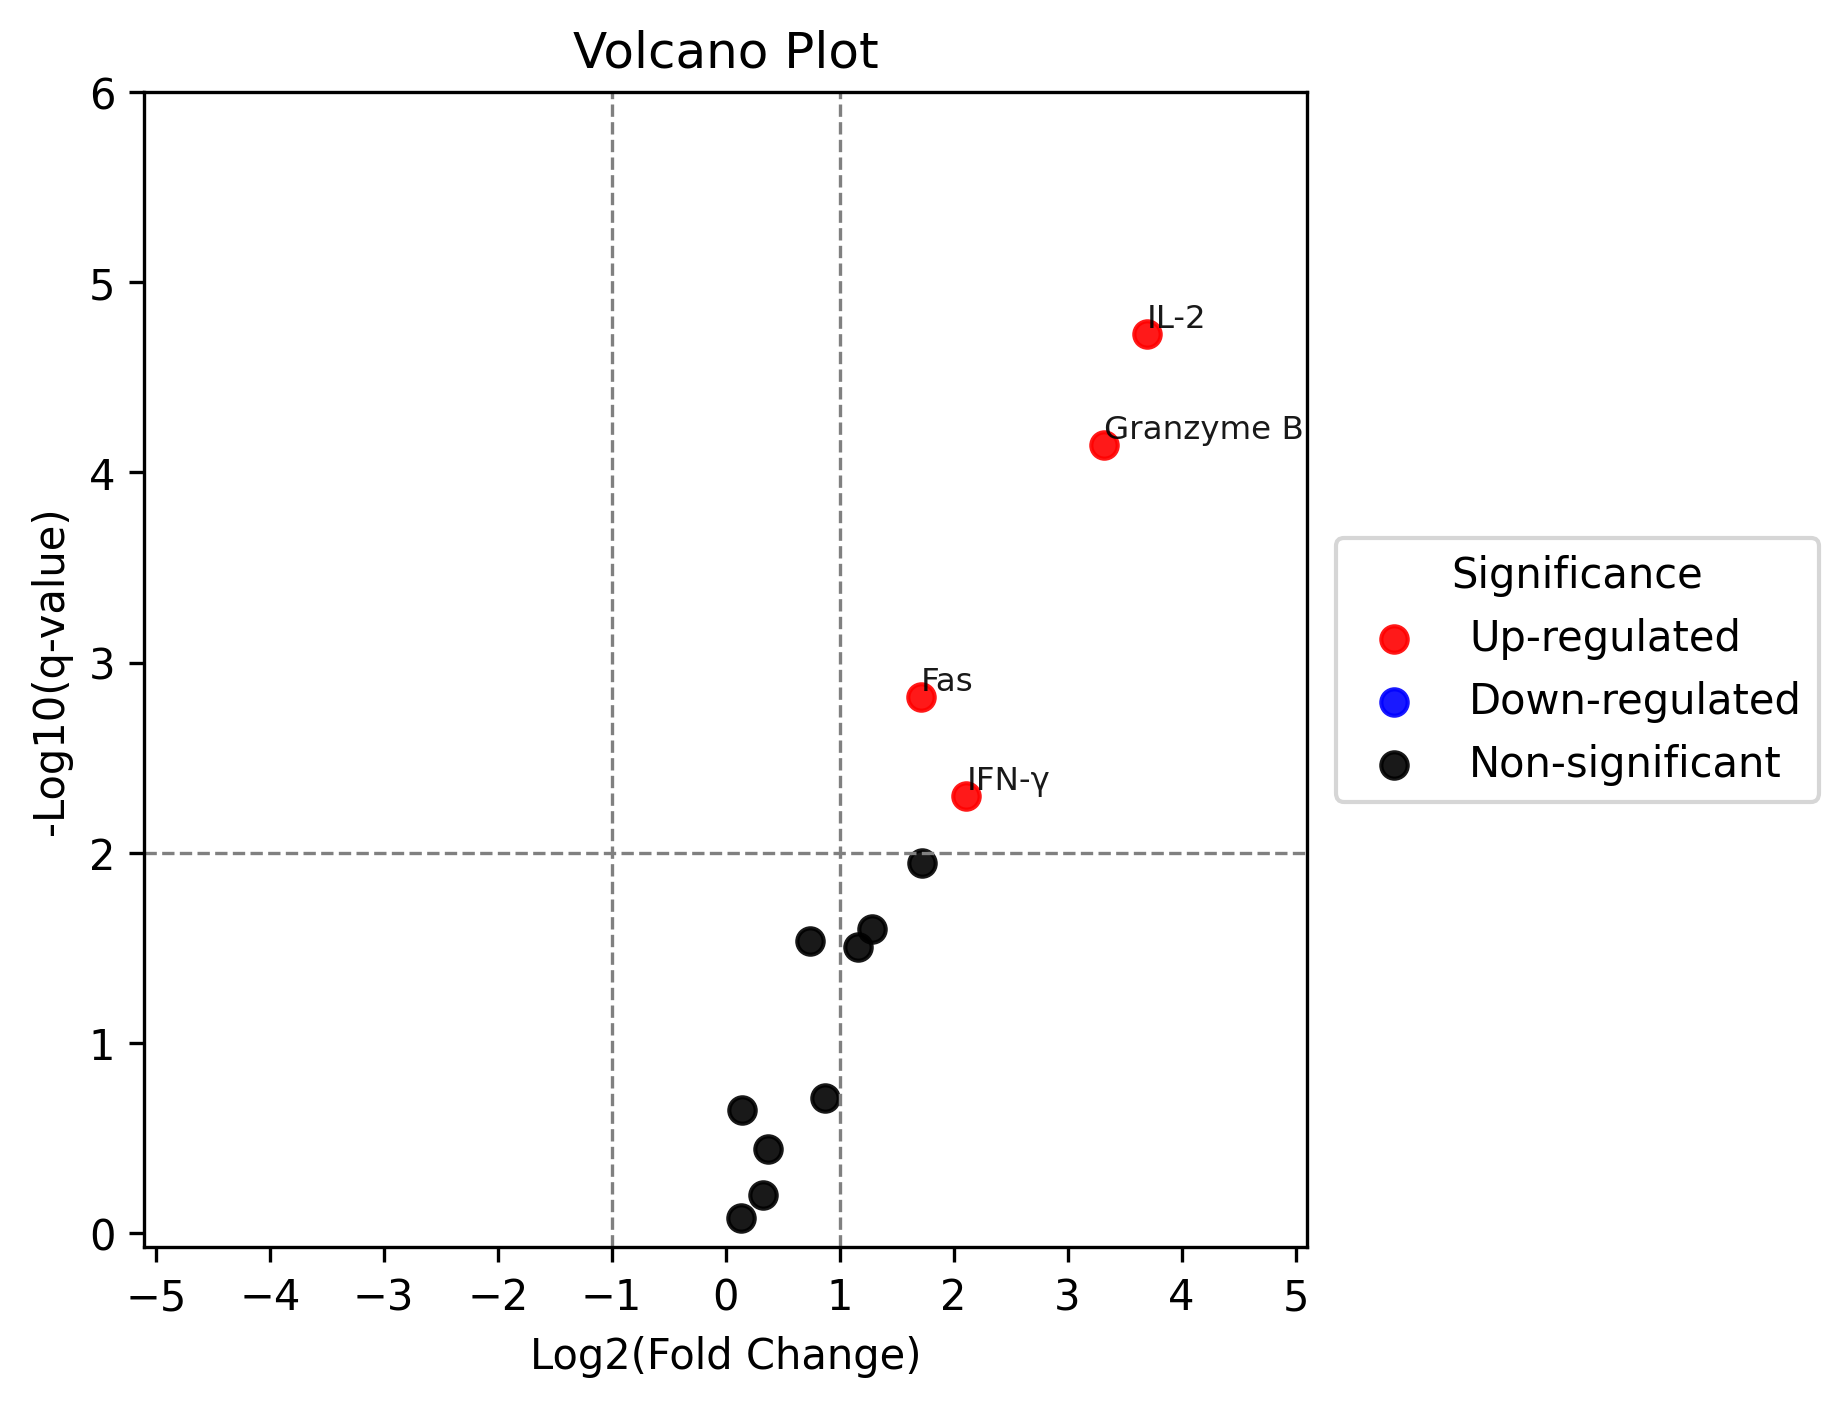

In [79]:
plt.figure(figsize=(5, 5), dpi=300)
colors = {Up_regulated_color: "Up-regulated", Down_regulated_color: "Down-regulated",  Non_significant_color: "Non-significant"}

for color, label in colors.items():
    subset = results_df[results_df["Color"] == color]
    plt.scatter(subset["log2(FC)"], subset["-log10(q-value)"], 
                color=color,
                marker='o',
                label=label,
                s=40,
                alpha=0.9)

 # Add labels for the top genes
for _, row in top_upregulated.iterrows():
    plt.text(row["log2(FC)"], row["-log10(q-value)"], row.name, alpha=0.9, fontsize=7.8, color='black', 
                                                                 ha="left", va='bottom')

for _, row in top_downregulated.iterrows():
    plt.text(row["log2(FC)"], row["-log10(q-value)"], row.name, alpha=0.9, fontsize=7.8, color='black',
                                                                ha="right", va='bottom')


# Add legend
plt.legend(title="Significance", fontsize=10, loc='center left', 
    bbox_to_anchor=(1.025, 0.5), borderaxespad=0.)

plt.xticks(np.arange(-6, 6.1, 1)) # Change tick size

# Add labels and title
plt.axhline(y=-np.log10(qval_threshold), color="grey", linestyle="--", linewidth=0.8)
plt.axvline(x=-fc_threshold, color="grey", linestyle="--", linewidth=0.8)
plt.axvline(x=fc_threshold, color="grey", linestyle="--", linewidth=0.8)

plt.xlabel("Log2(Fold Change)")
plt.ylabel("-Log10(q-value)")
plt.title("Volcano Plot")

plt.ylim(-0.075,6)
plt.xlim(-5.1,5.1)

# Save the plot
plt.savefig('Volcano Plot #1.png', dpi=600, bbox_inches='tight')
plt.show()